# 1.2 Define data

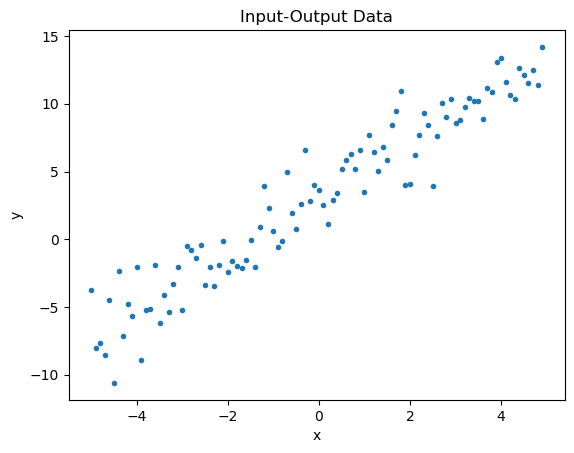

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1)

# Define linear function parameters
w1 = 2
w0 = 3

# Generate input data samples
x = np.arange(-5, 5, 0.1)

# Generate Gaussian noise
m = len(x)
noise = 2 * np.random.randn(m)

# Generate output data
y = w1 * x + w0 + noise

# Number of parameters
N = 2

# Create training data set
idx = np.random.randint(0, m, m)
X = np.vstack((np.ones(m), x)).T

# Plot input-output data
plt.figure()
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Input-Output Data')
plt.show()

# 1.3 Machine learning - train a linear regression model using SGD

In [2]:
# Initialize SGD algorithm parameters
epsilon = 0.2  # learning rate
theta = np.zeros(N)  # initialize parameters
maxIter = m  # set number of training iterations
lossTrain = np.empty(maxIter)  # initialize loss function storage
thetaStore = np.empty((N, maxIter))  # initialize parameter storage

# Loop over data samples
for j in range(maxIter):

    # Model prediction using a single random data point
    yhat = np.dot(theta, X[idx[j]])

    # Estimate gradient of loss function
    g = (yhat - y[idx[j]]) * X[idx[j]]

    # SGD parameter estimation algorithm update
    theta = theta - epsilon * g

    # Store parameter values for analysis in the next part
    thetaStore[:, j] = theta

# 1.4 Plot the output and evaluate results


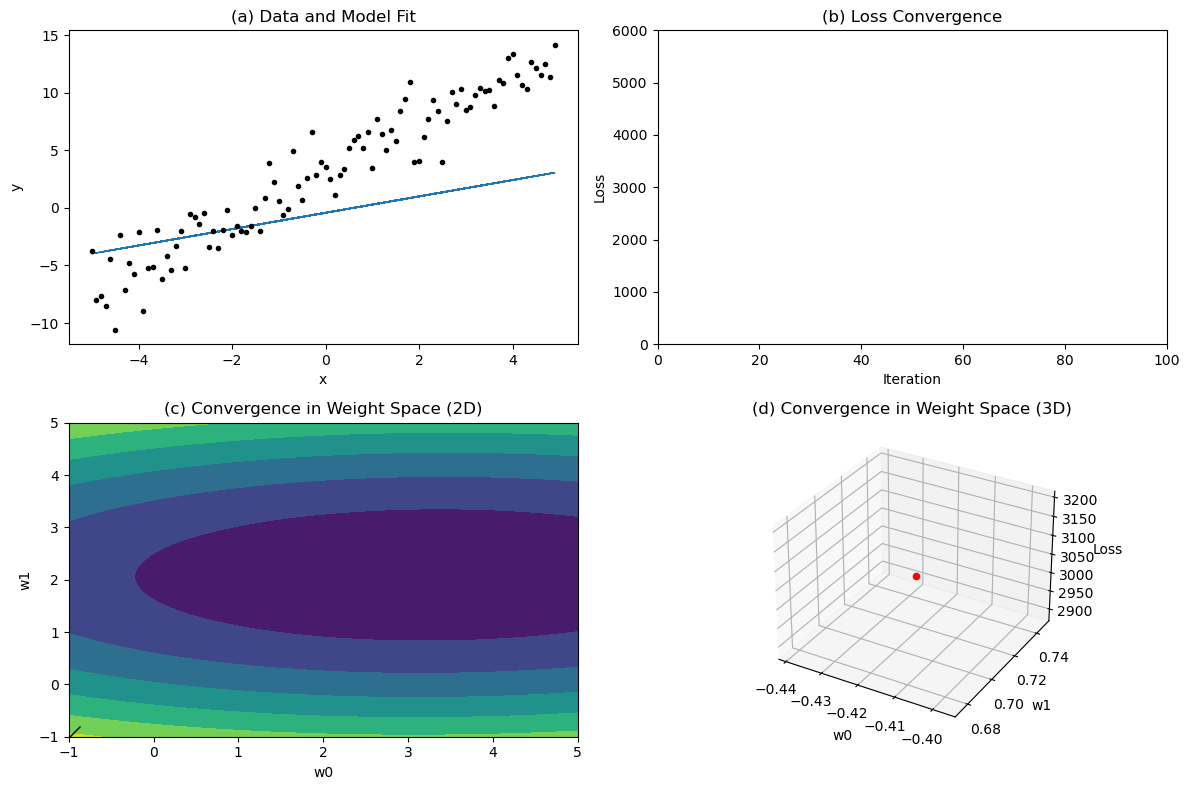

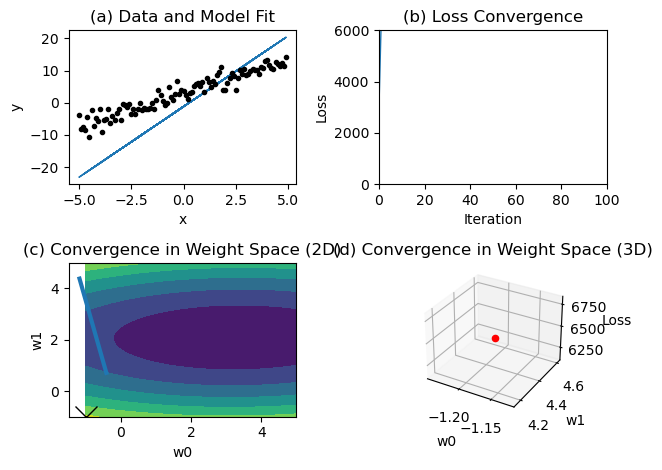

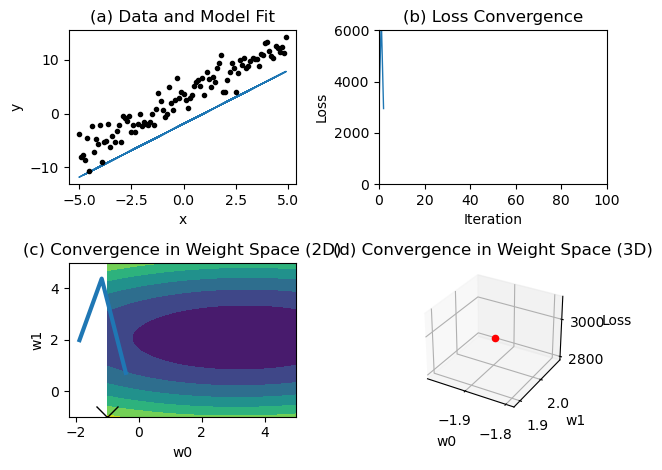

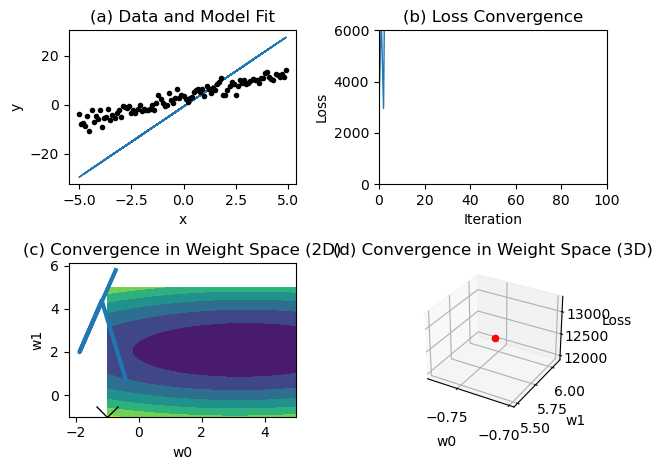

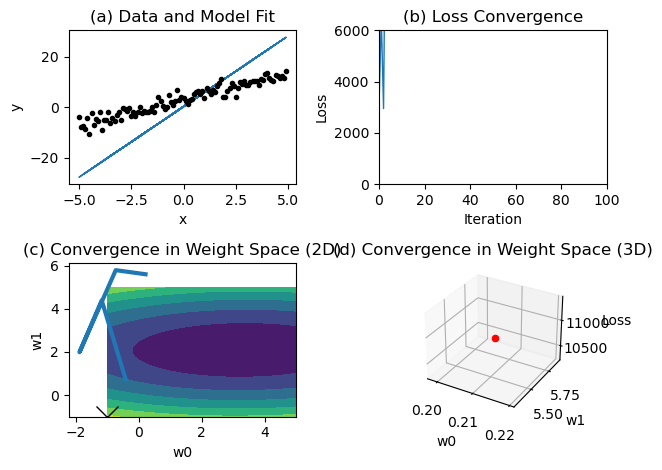

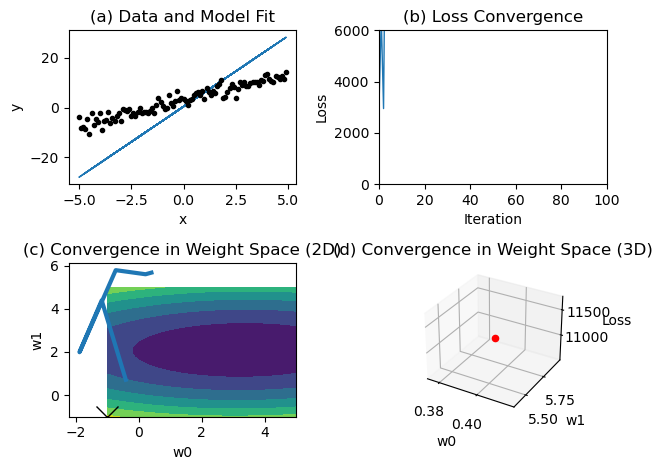

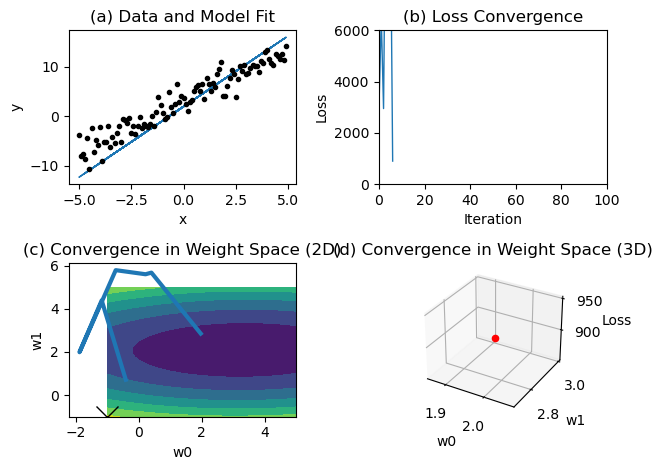

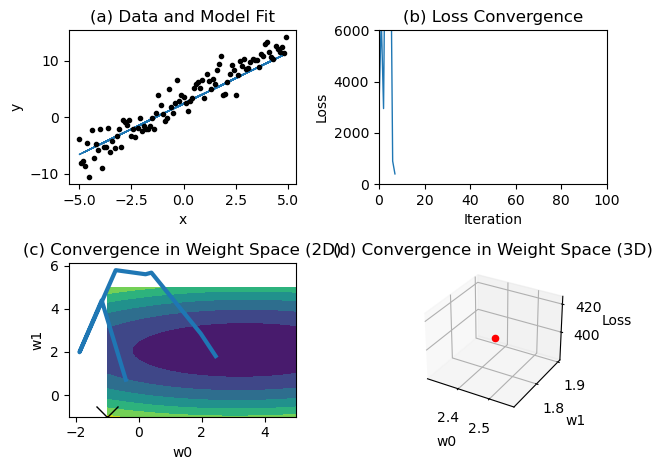

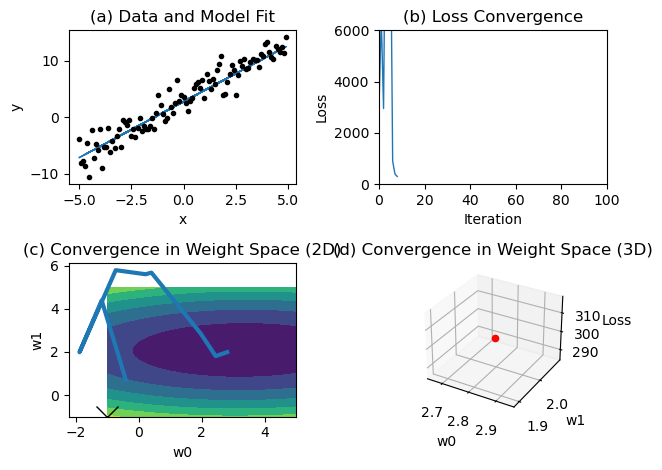

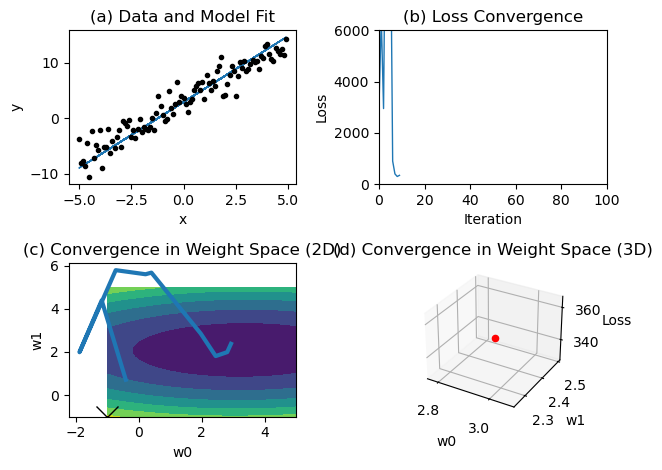

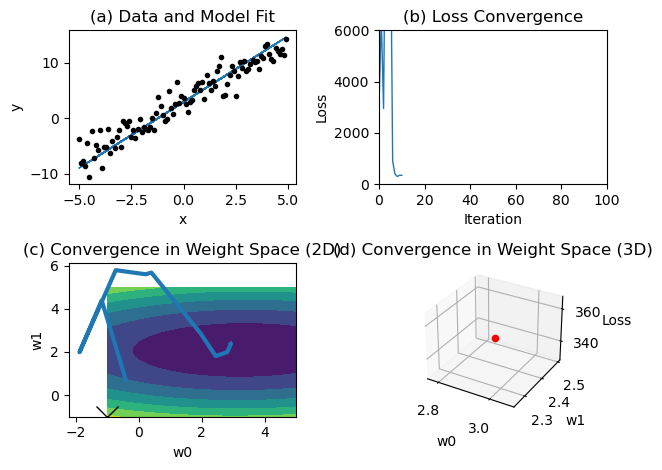

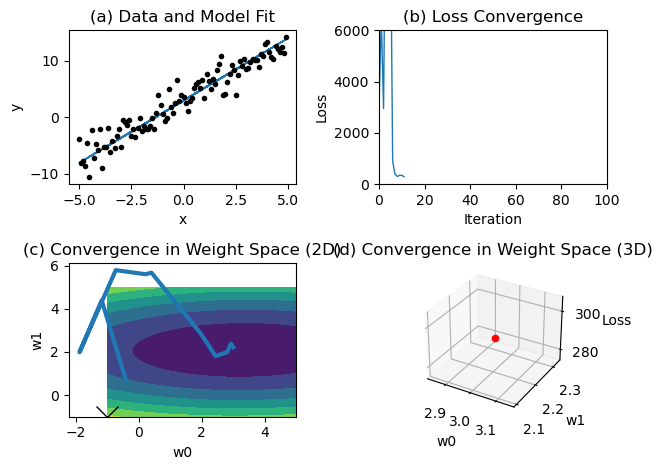

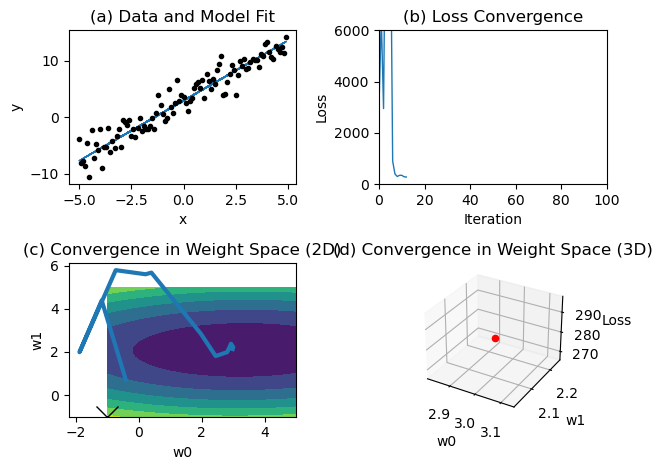

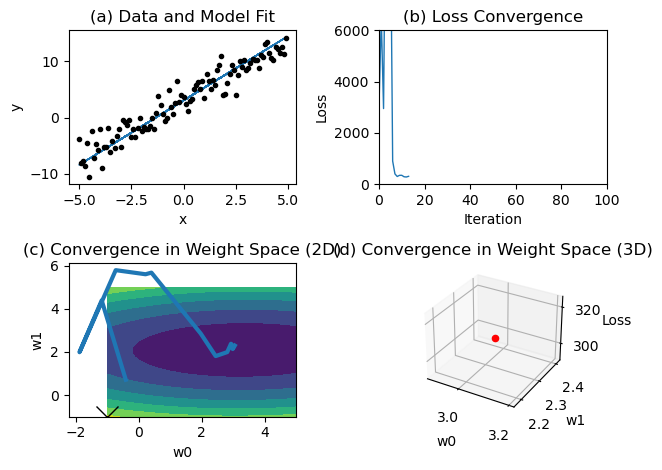

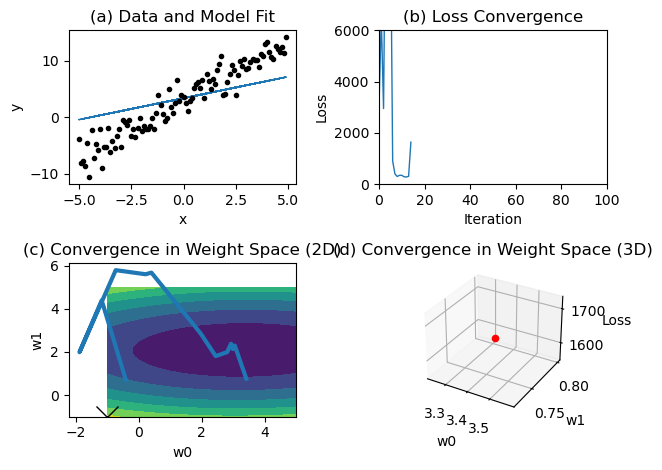

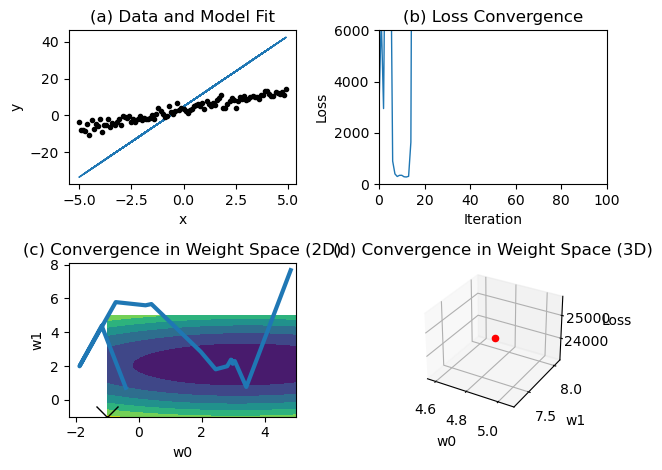

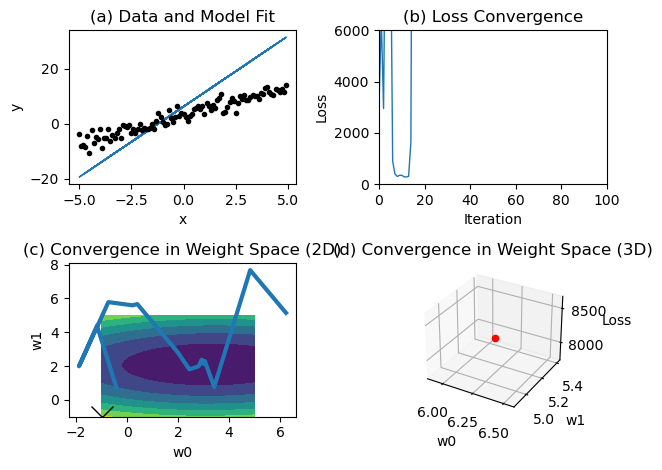

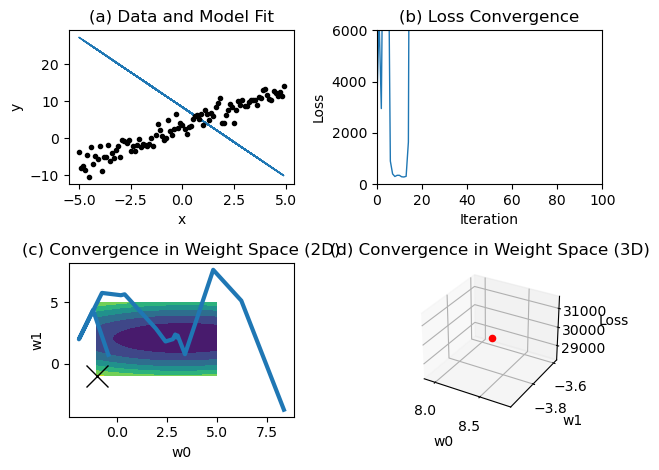

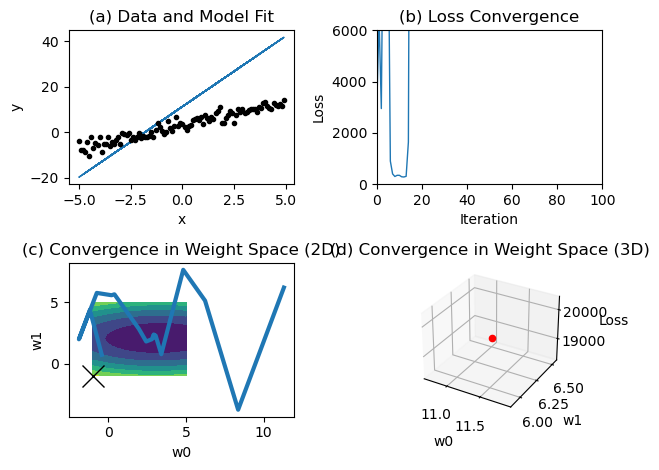

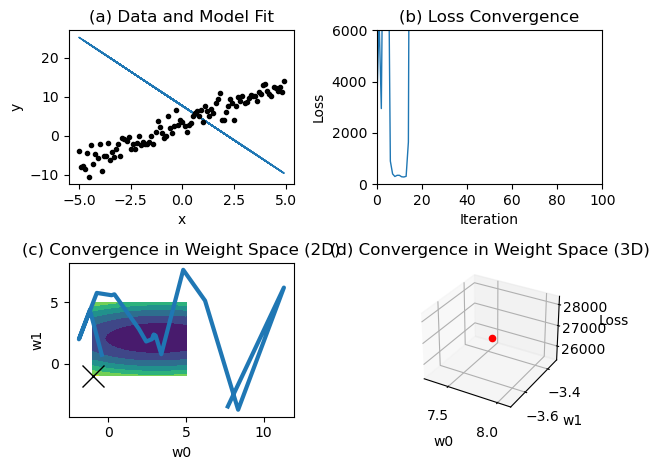

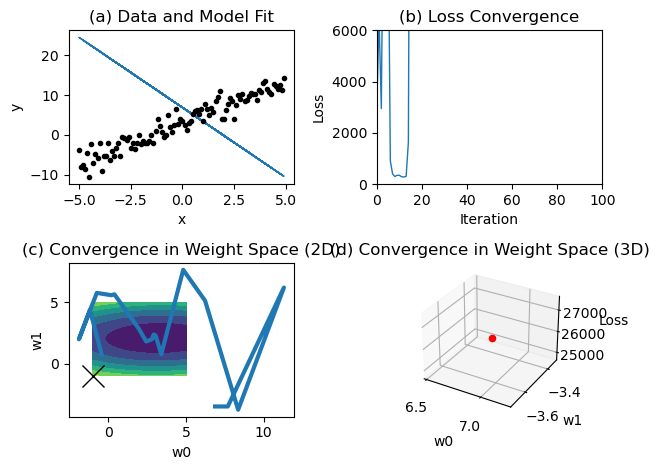

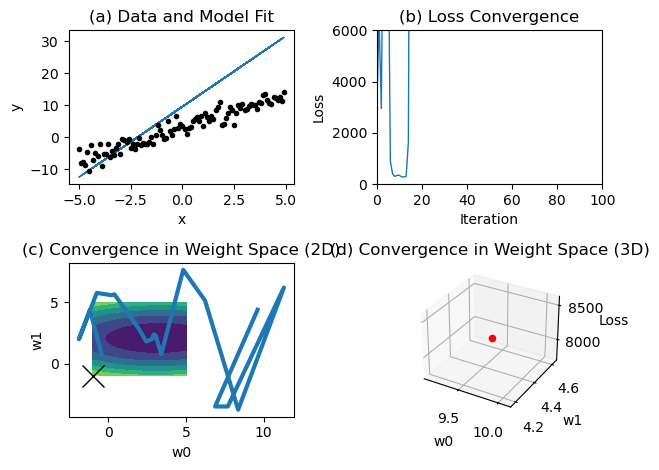

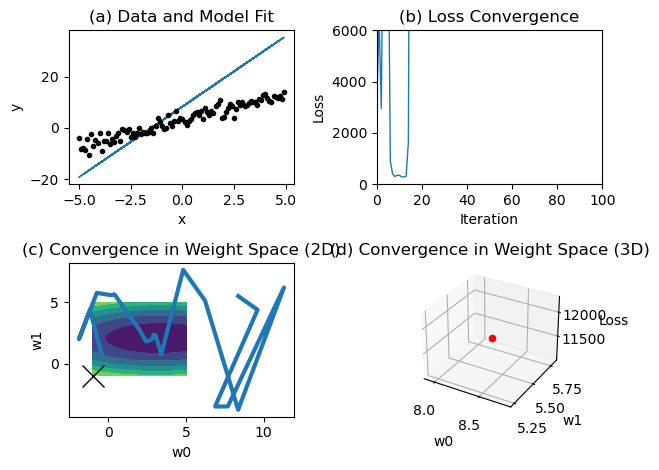

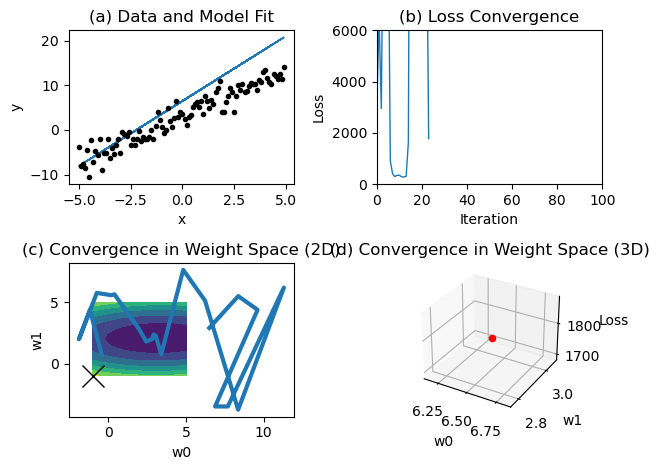

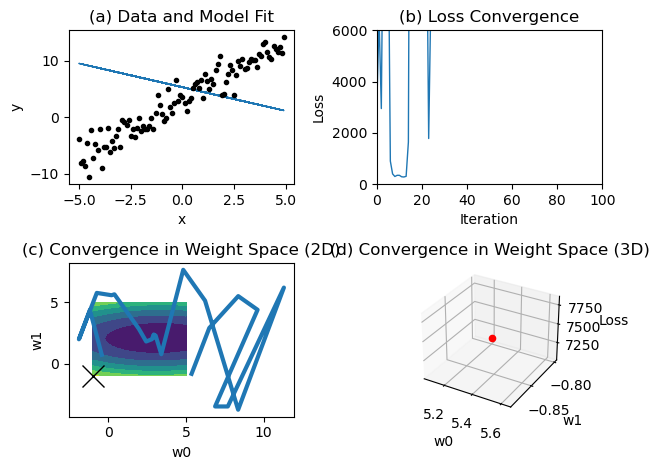

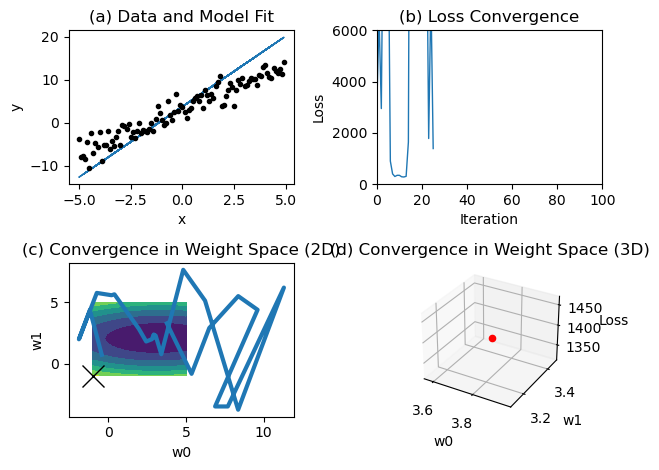

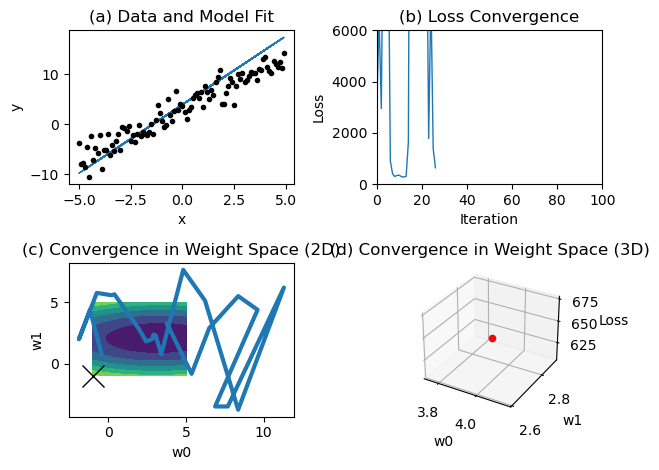

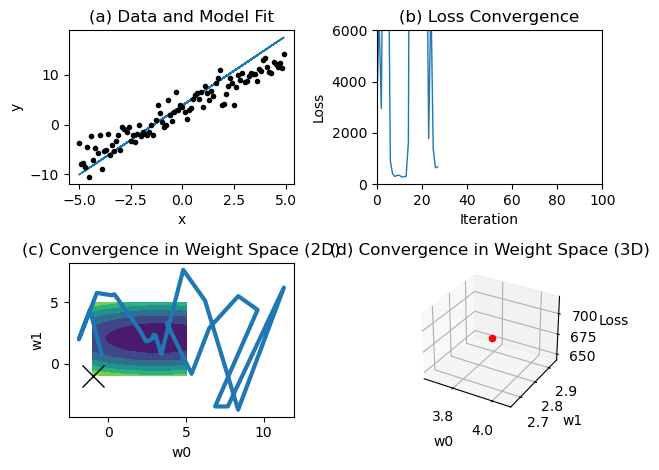

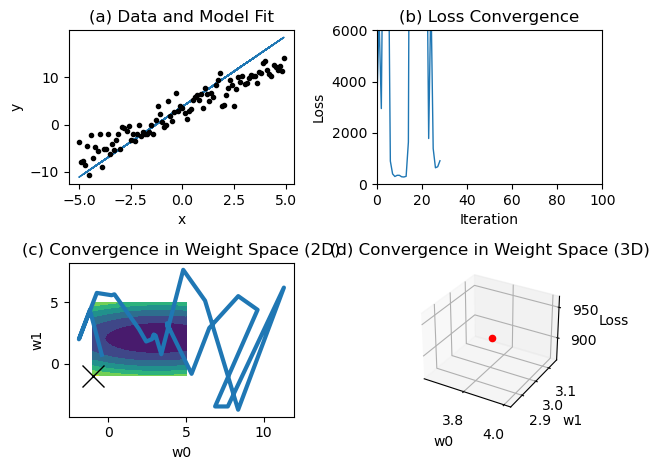

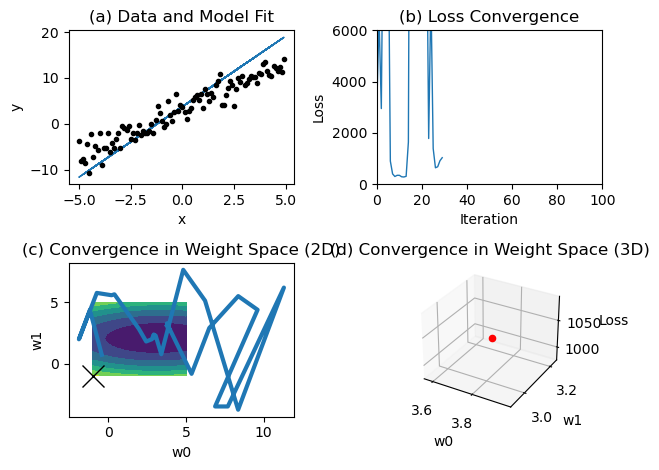

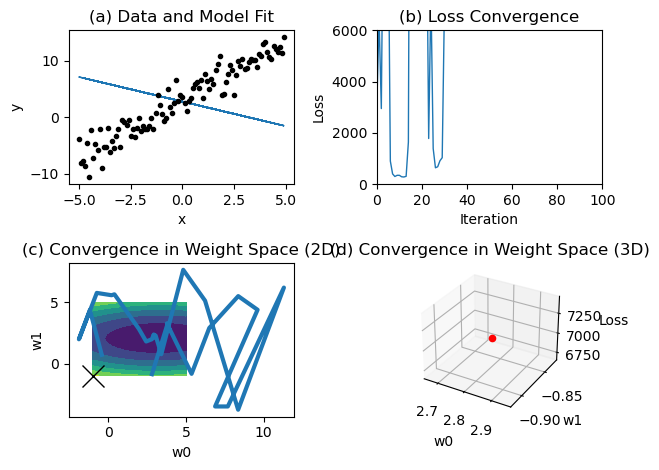

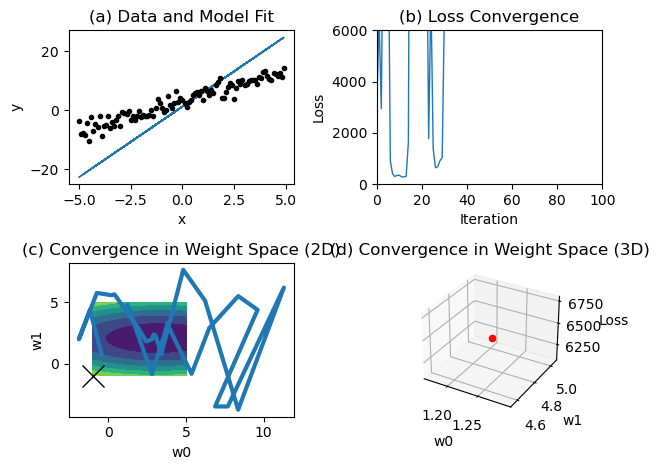

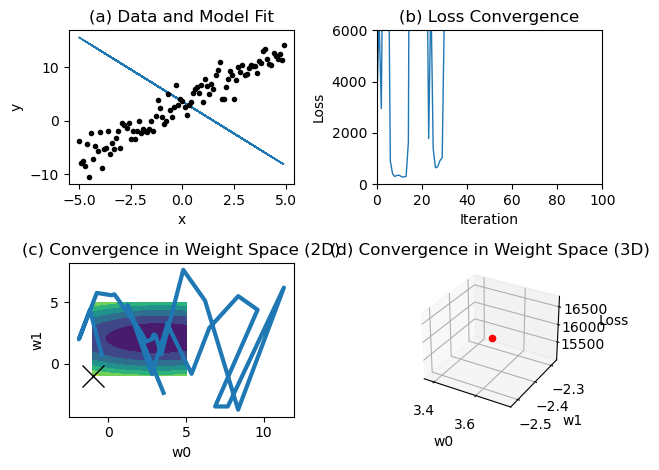

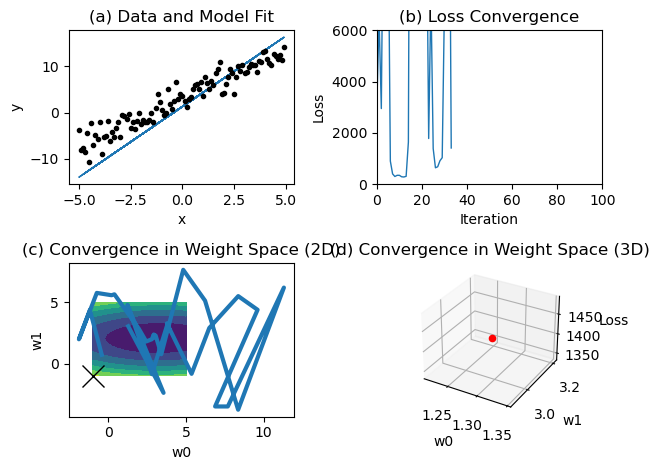

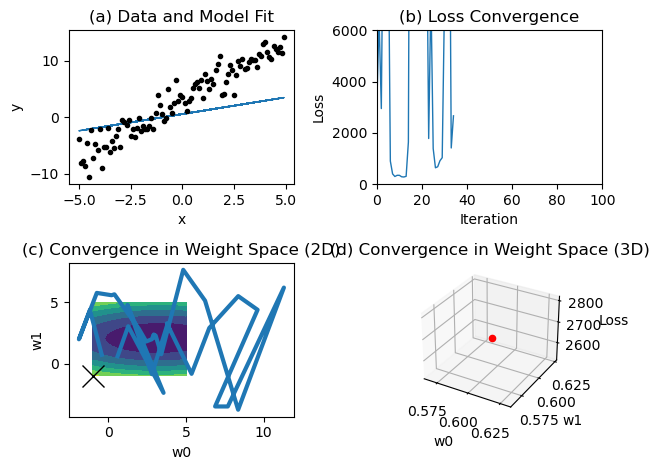

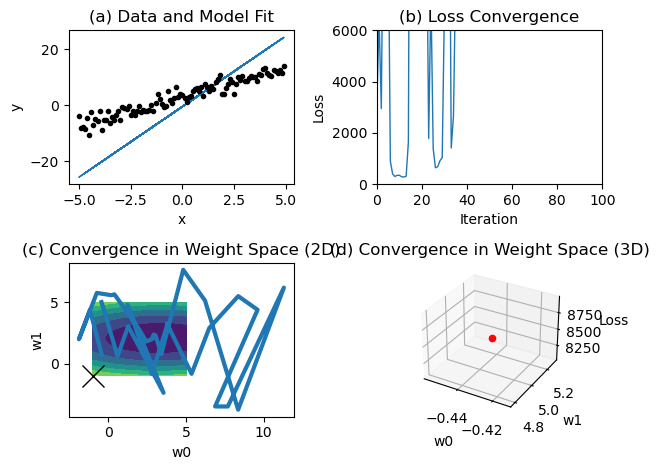

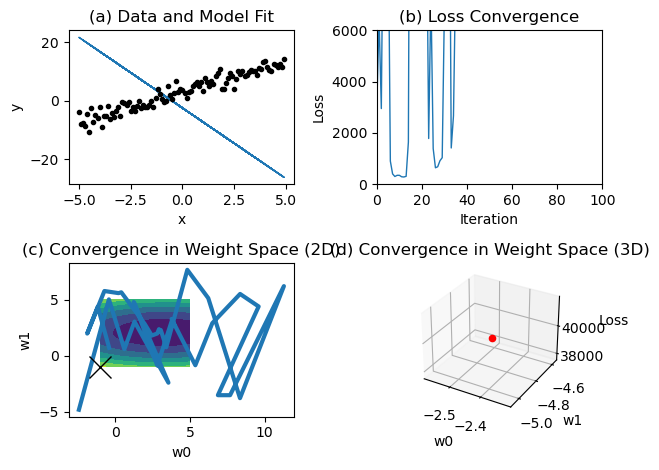

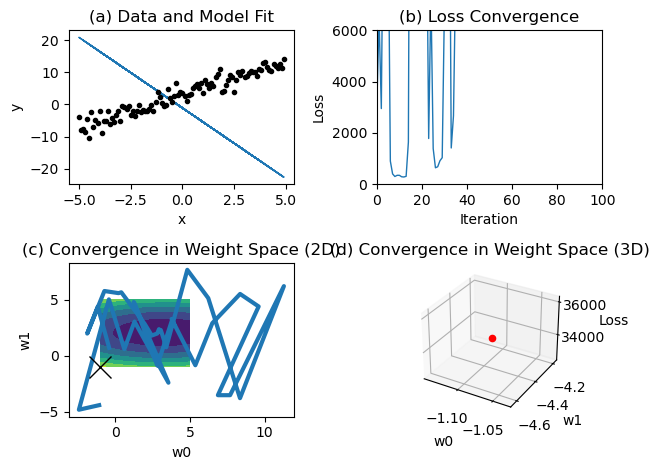

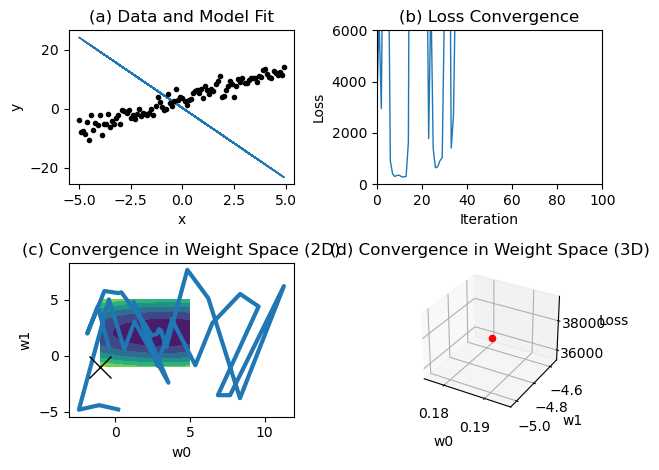

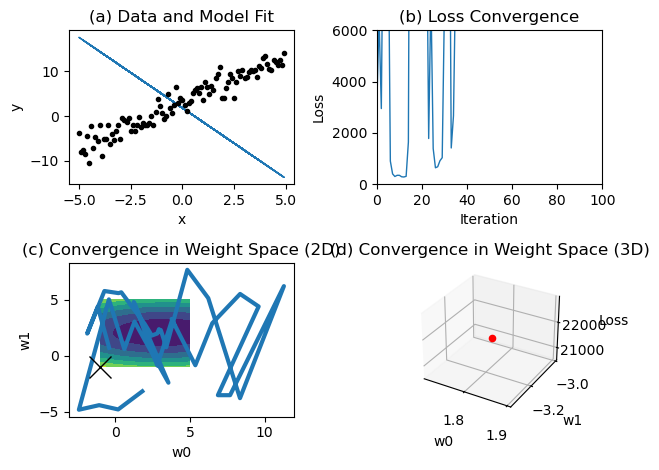

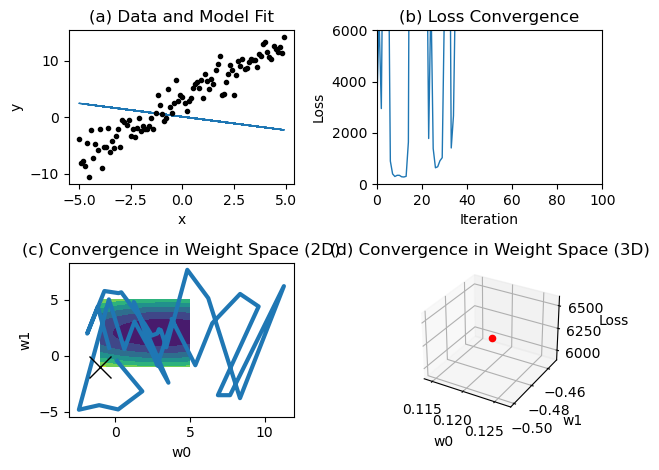

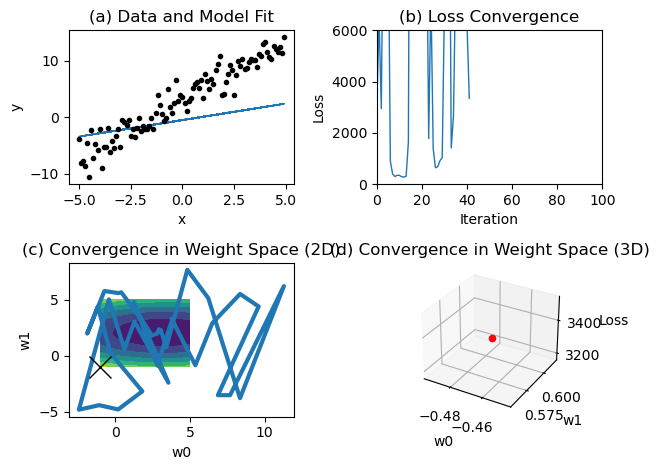

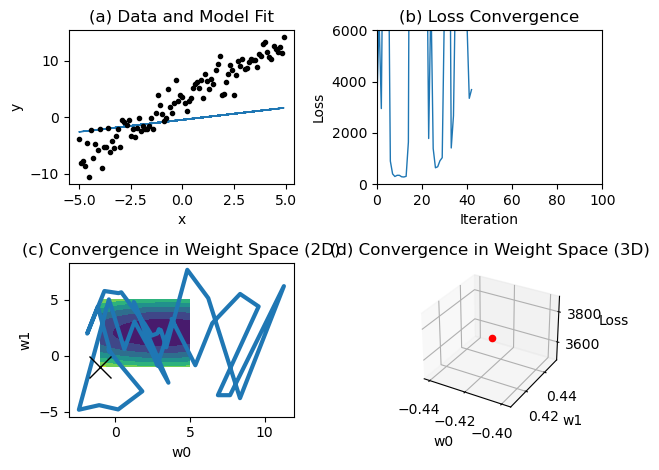

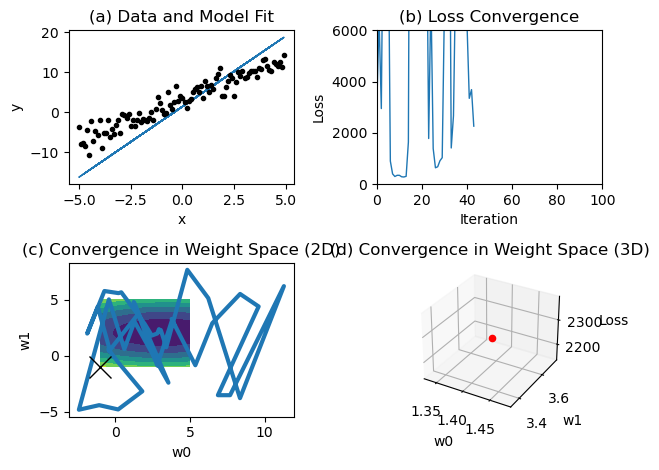

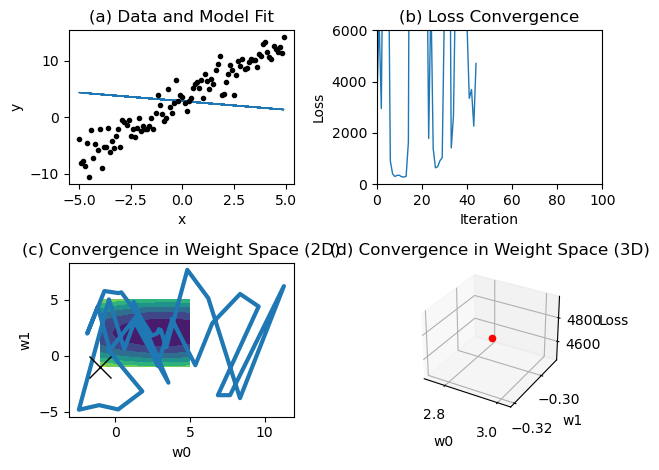

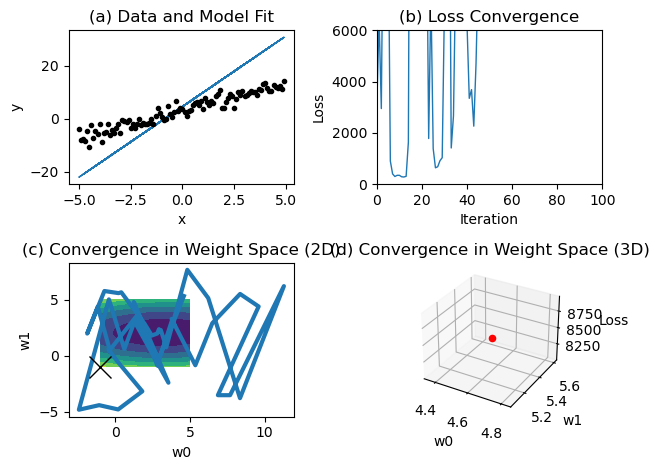

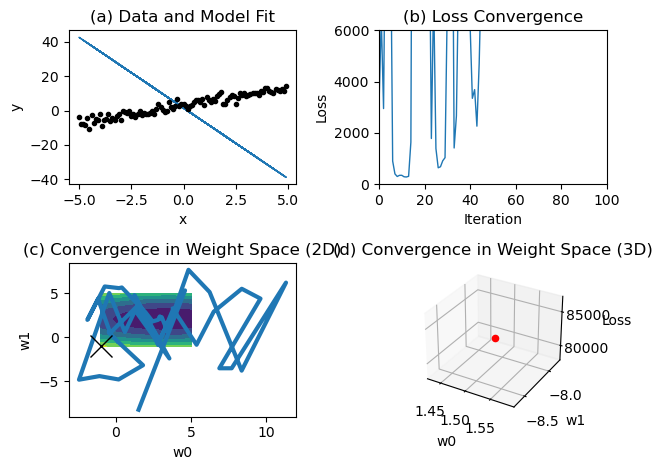

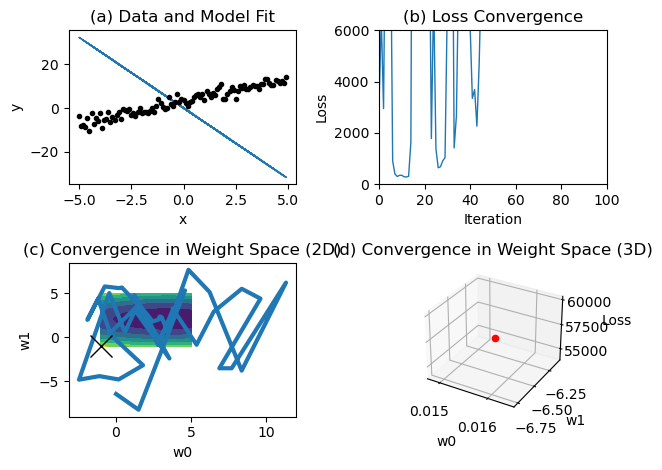

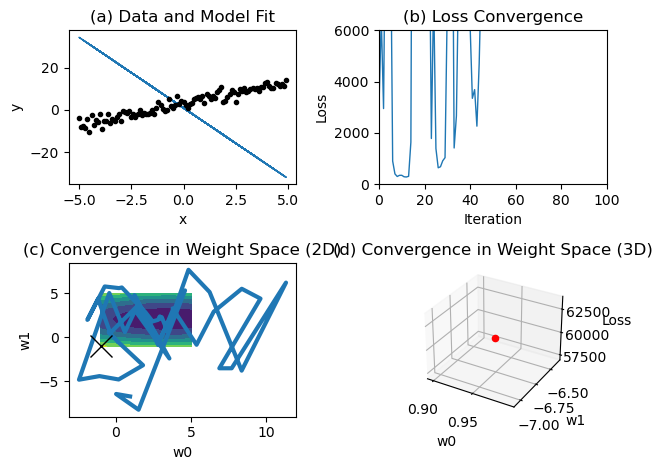

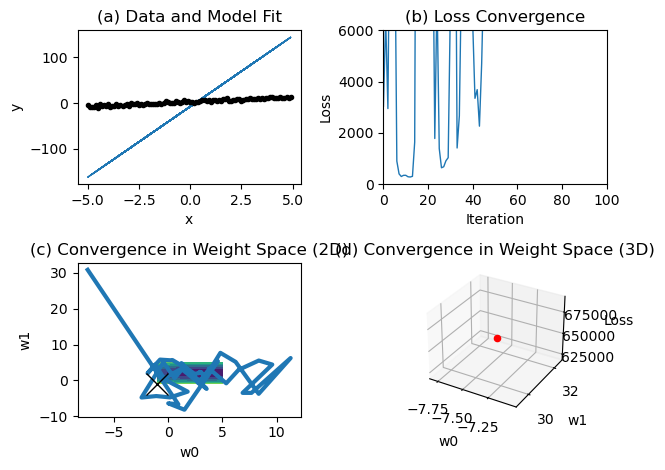

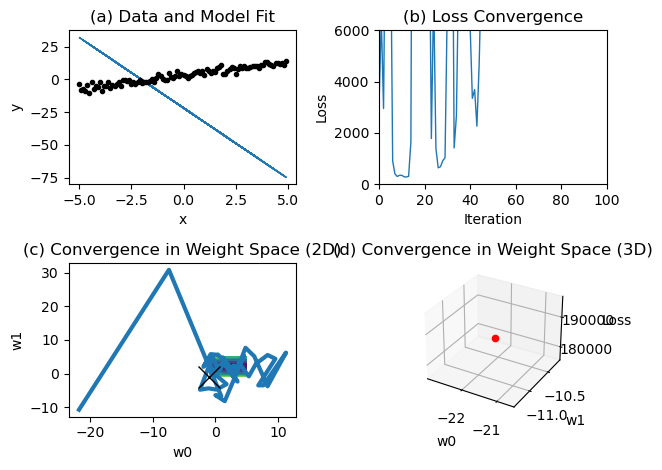

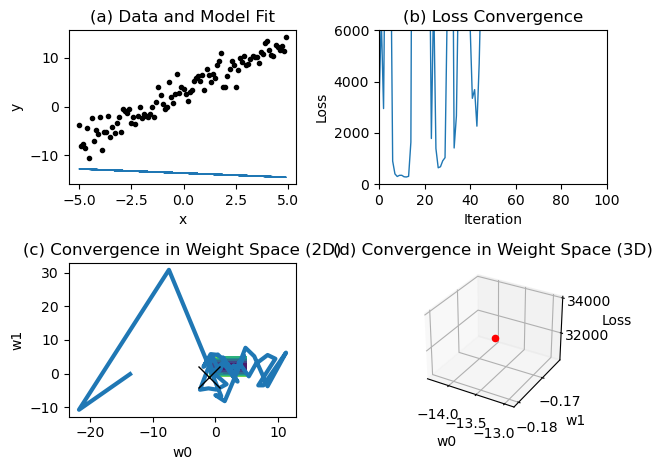

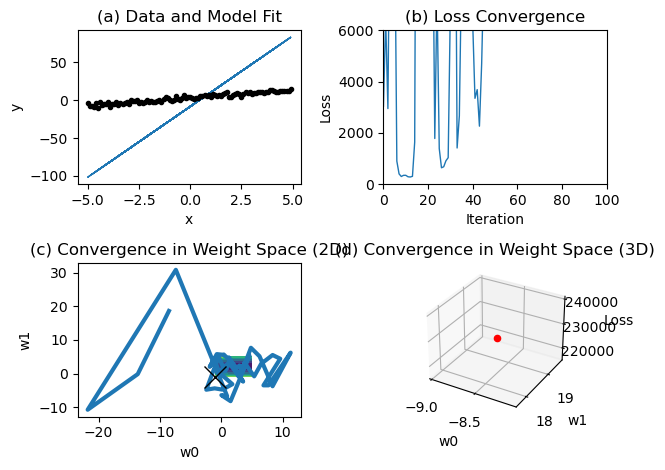

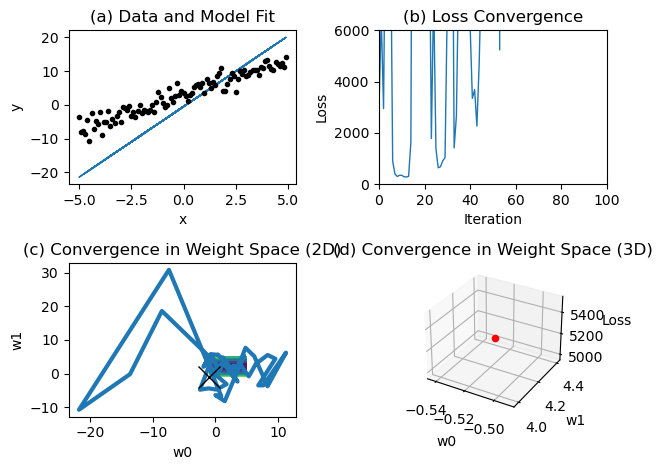

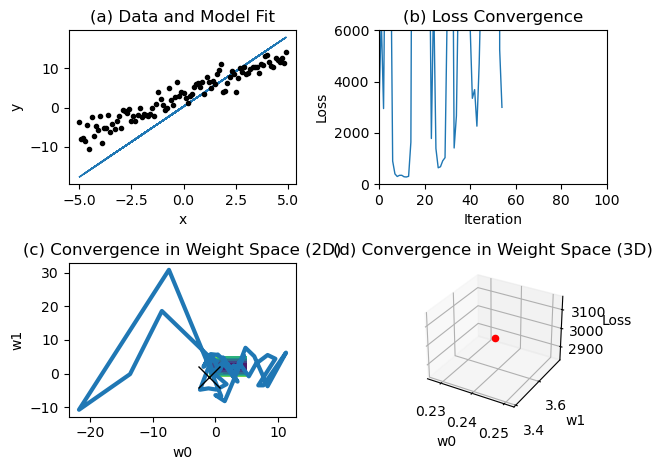

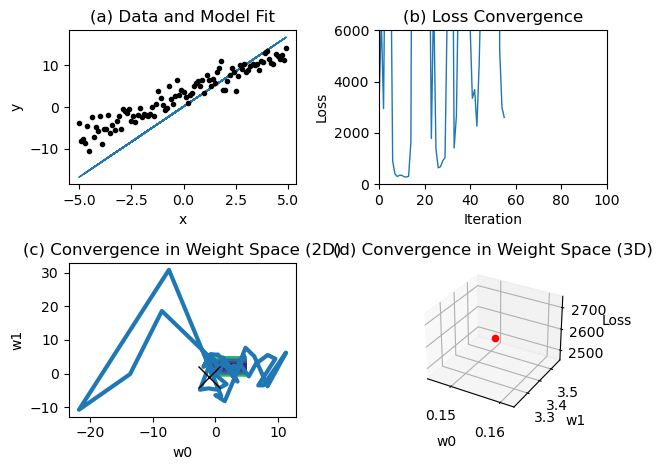

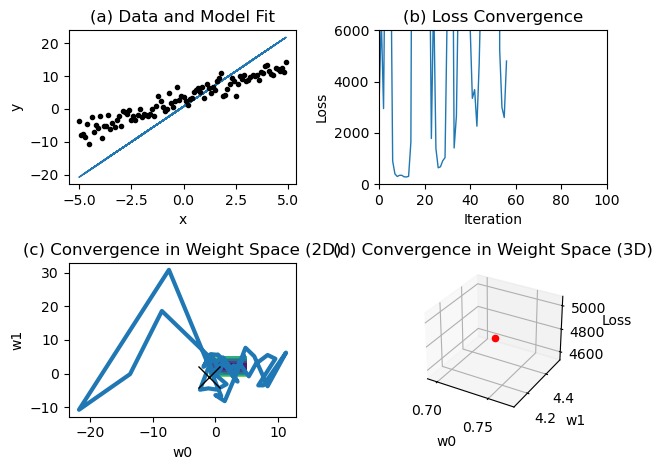

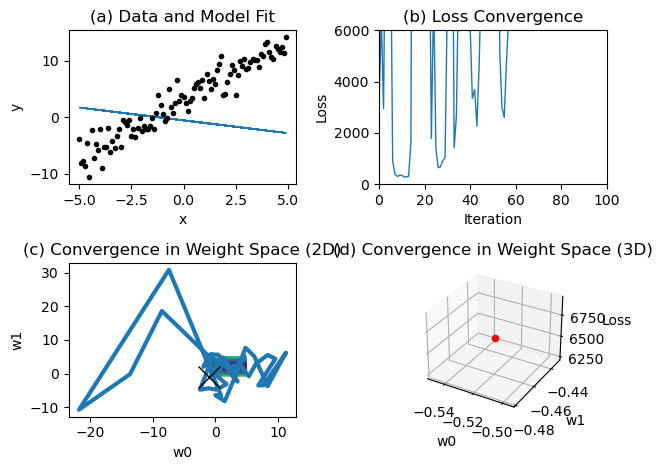

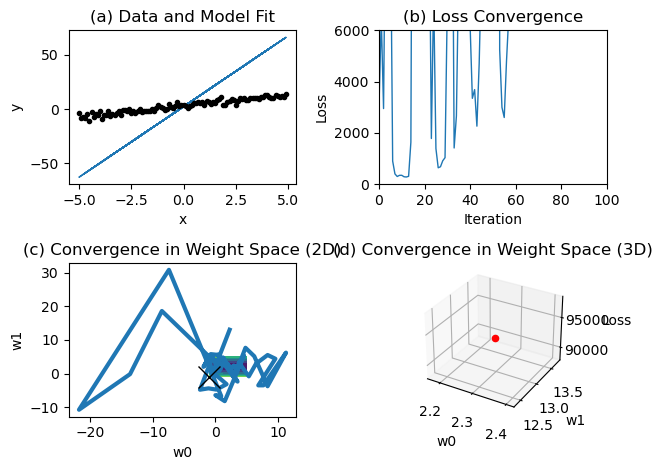

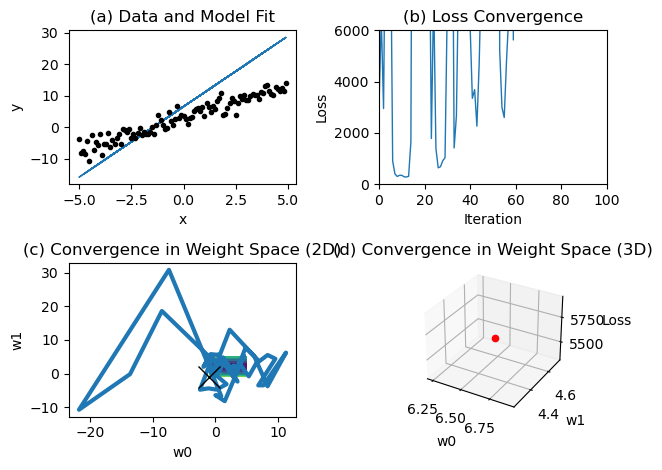

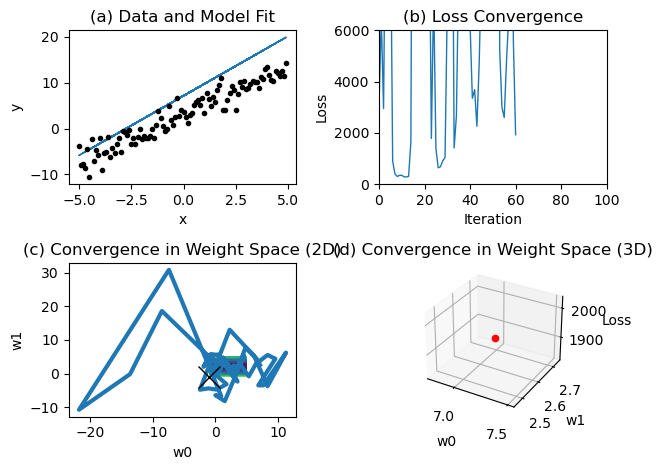

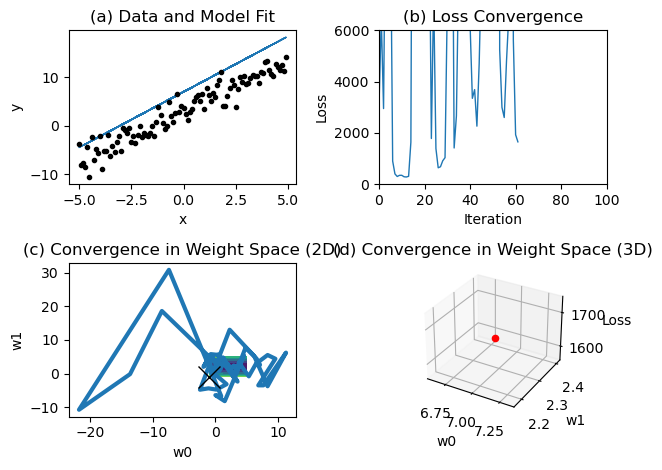

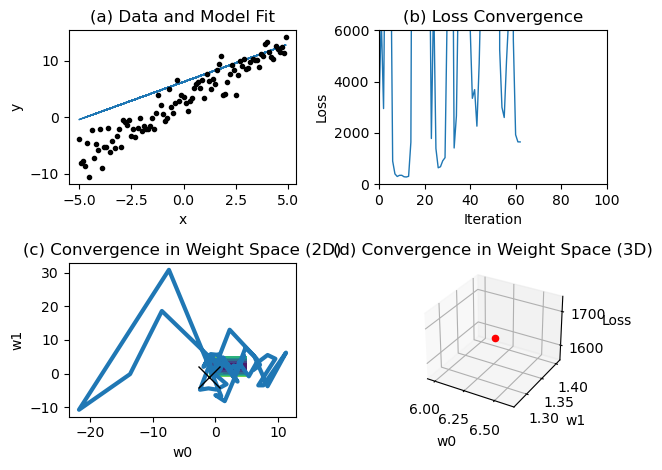

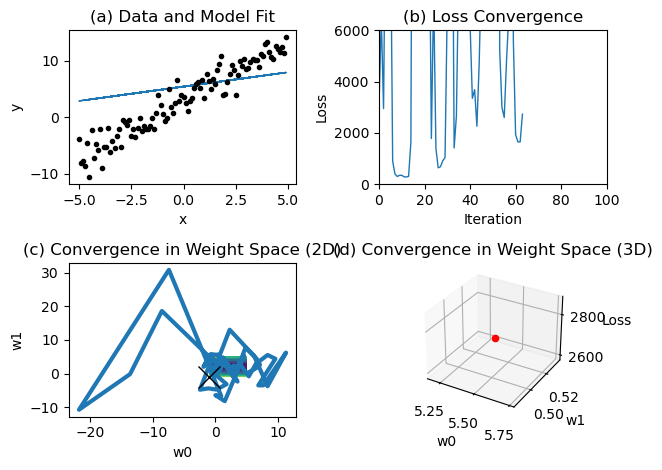

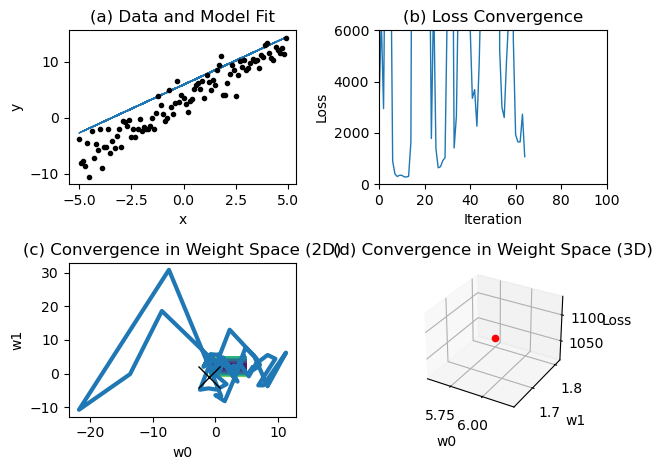

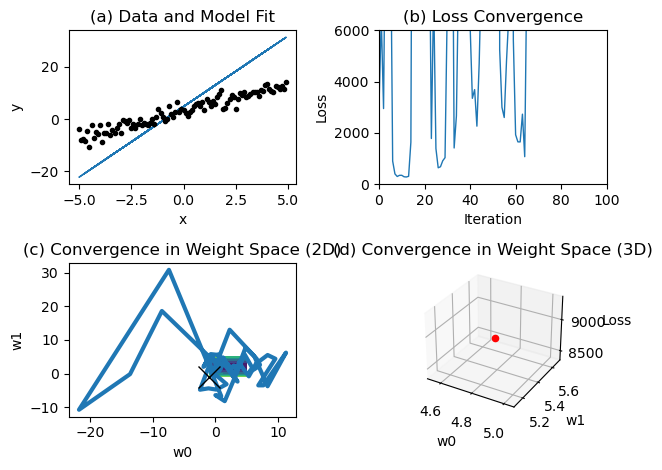

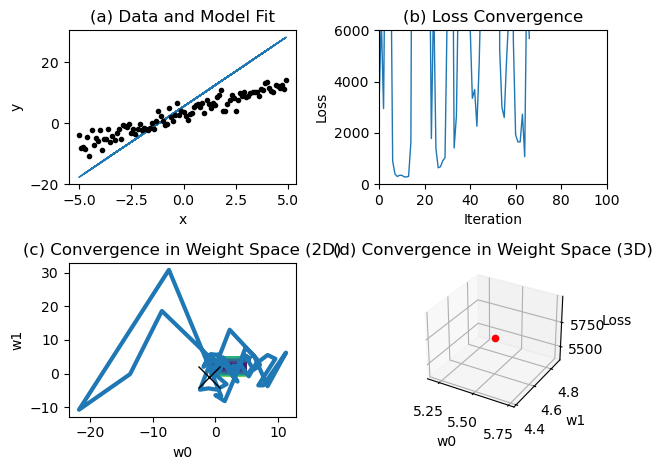

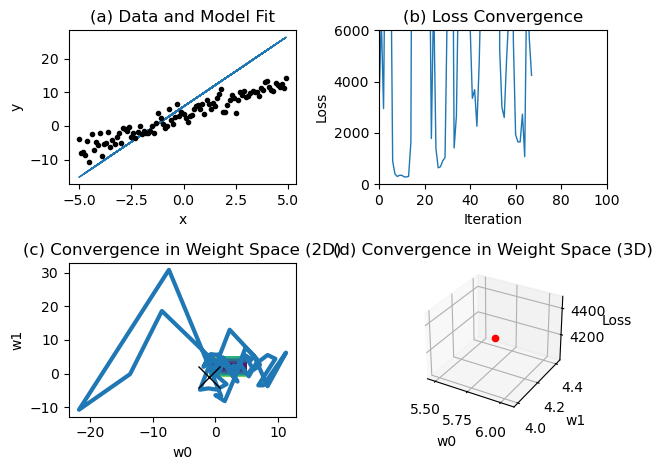

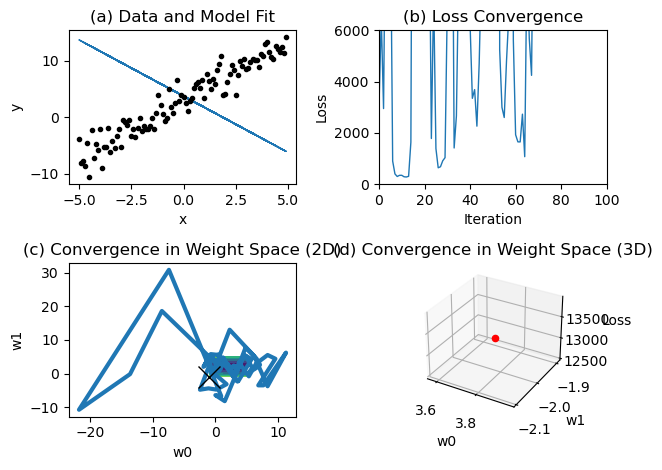

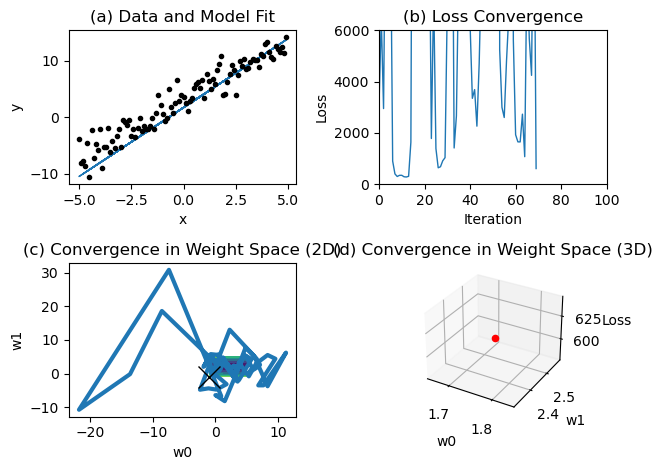

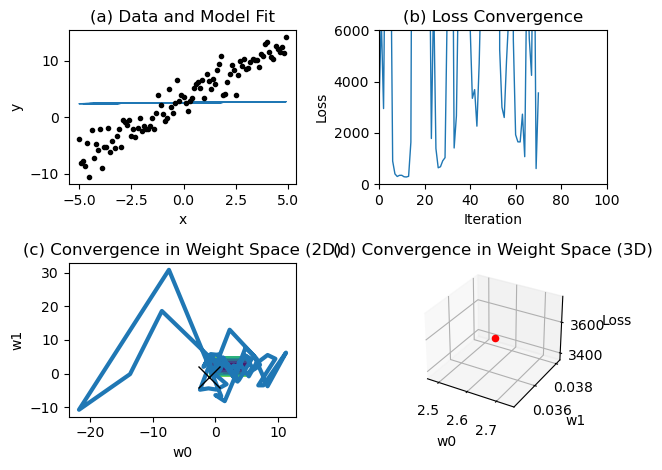

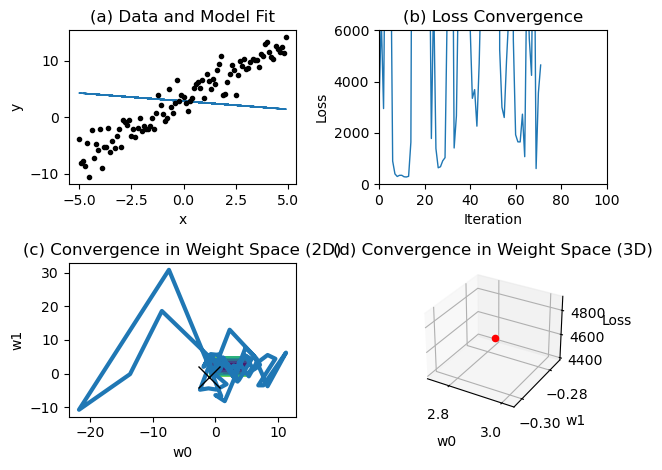

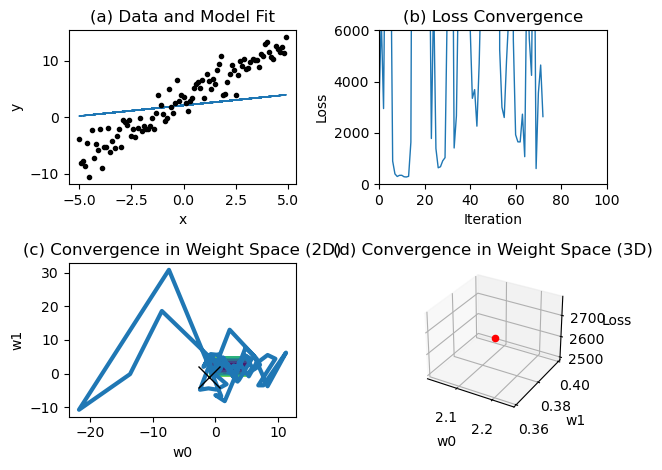

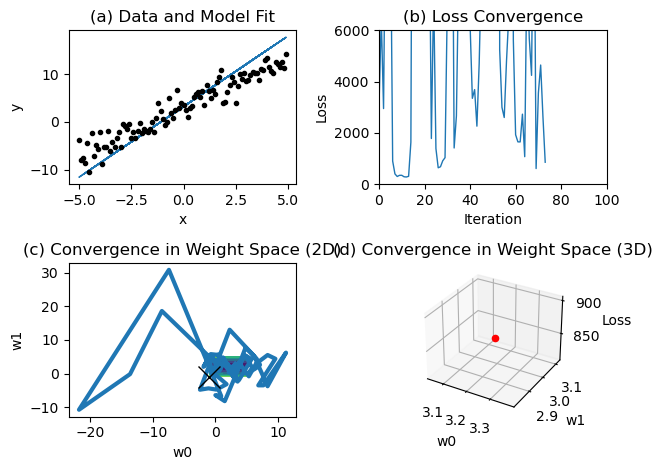

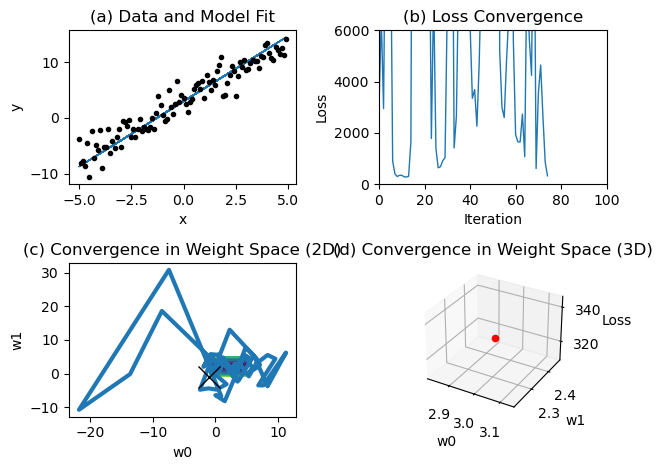

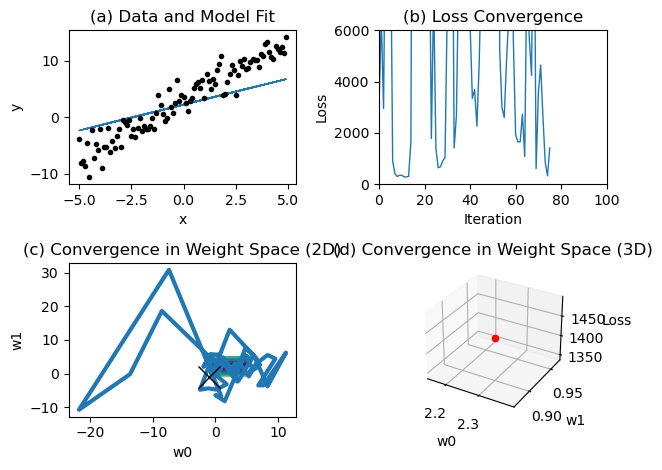

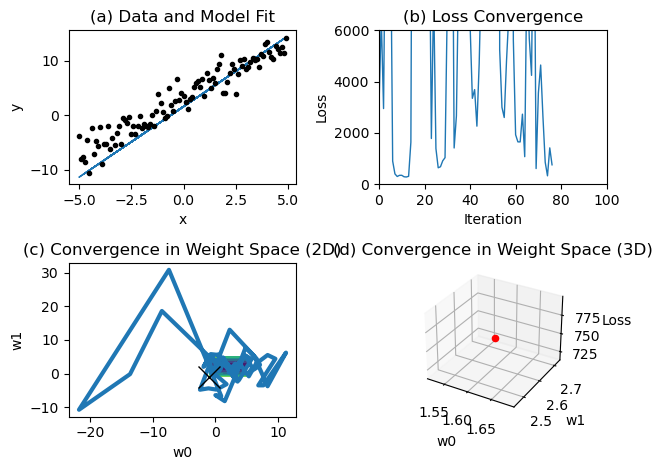

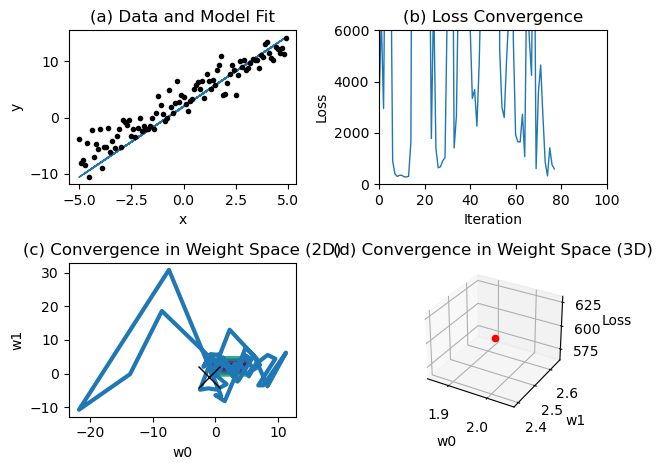

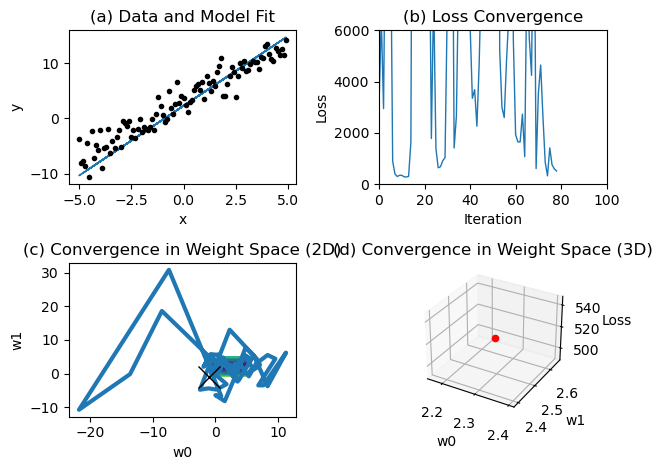

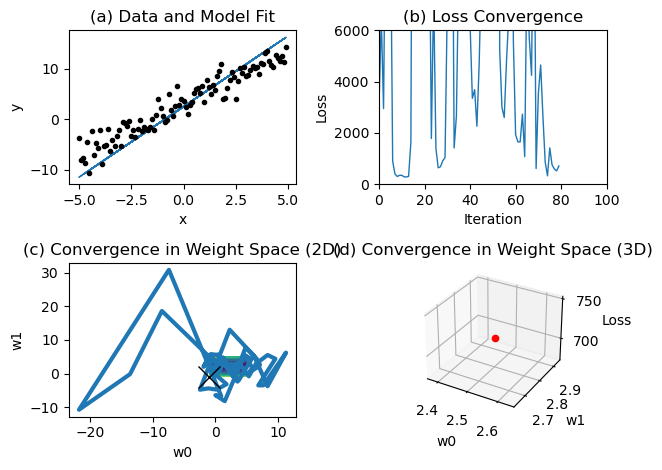

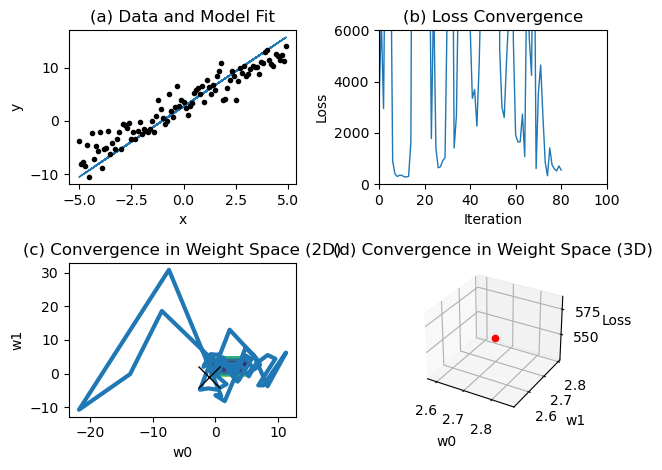

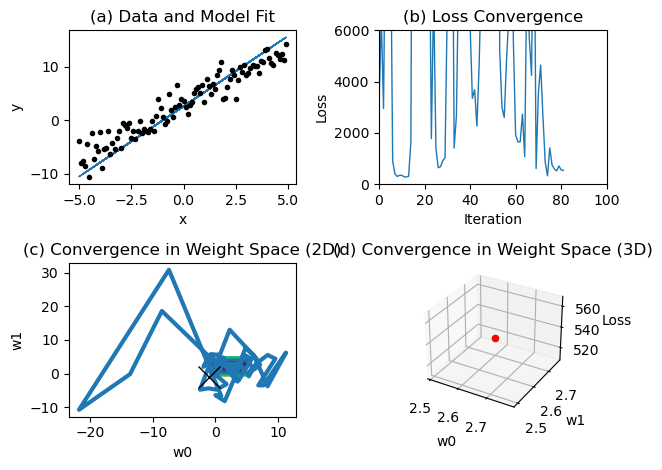

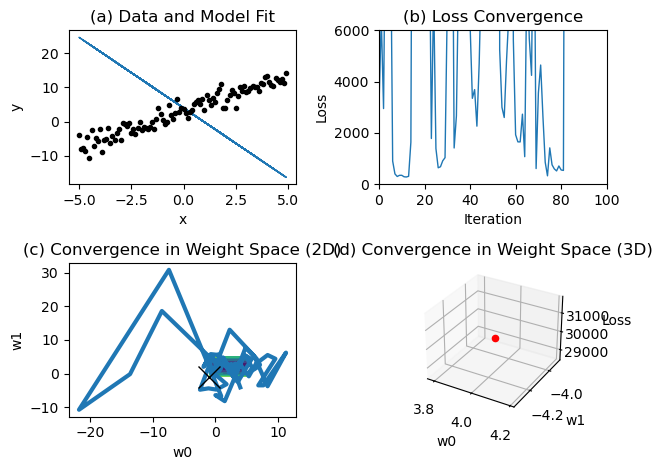

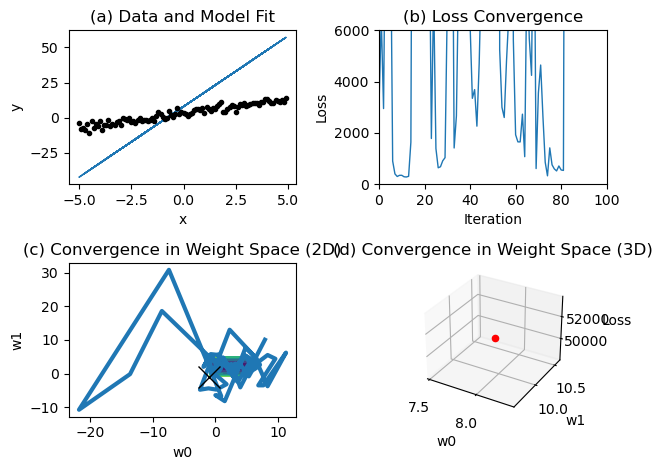

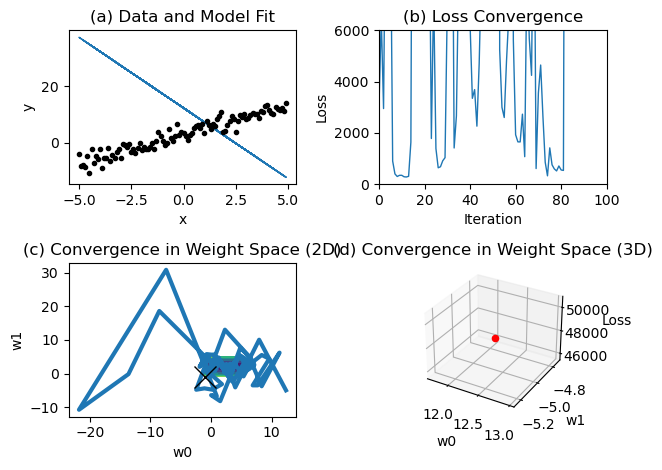

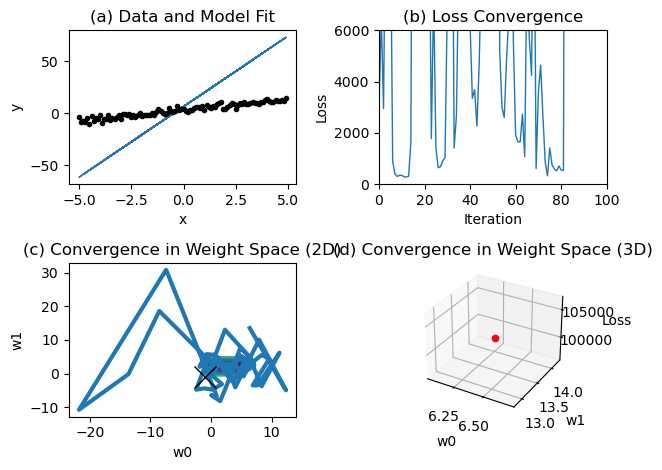

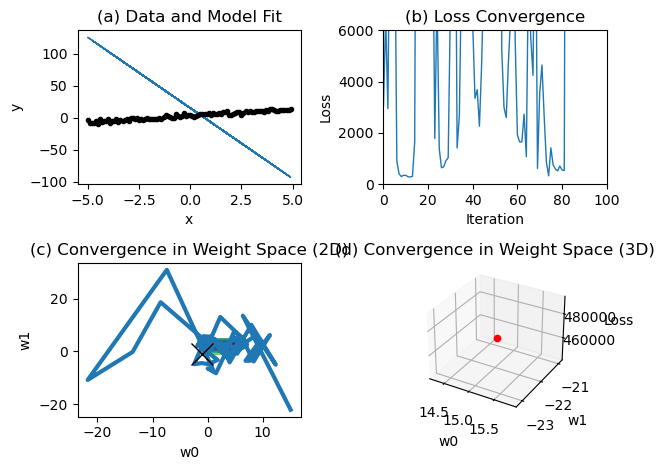

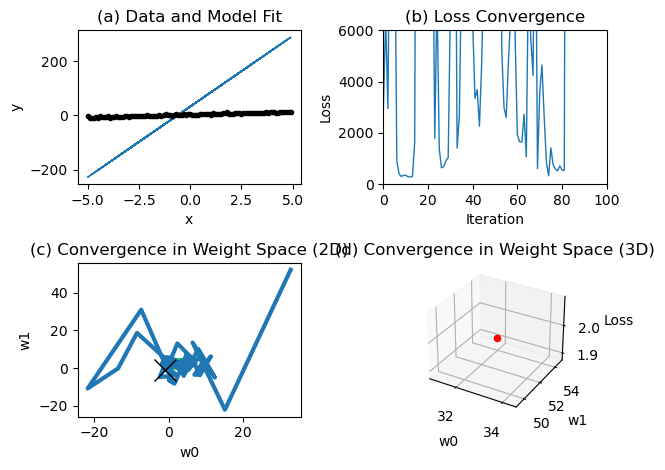

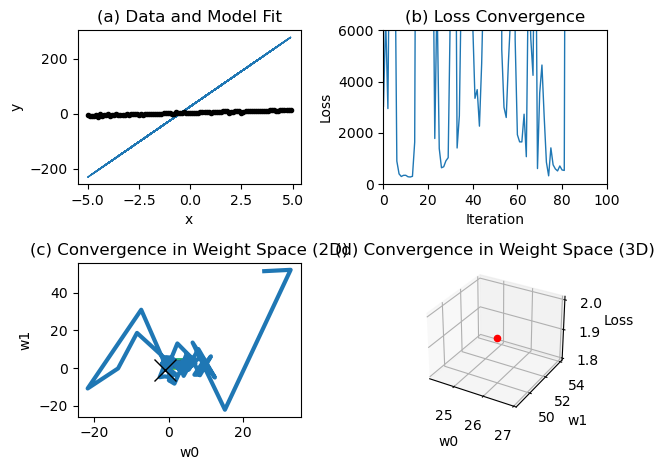

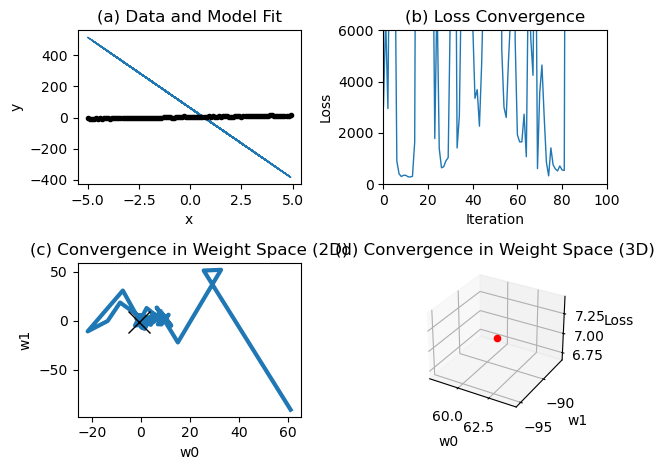

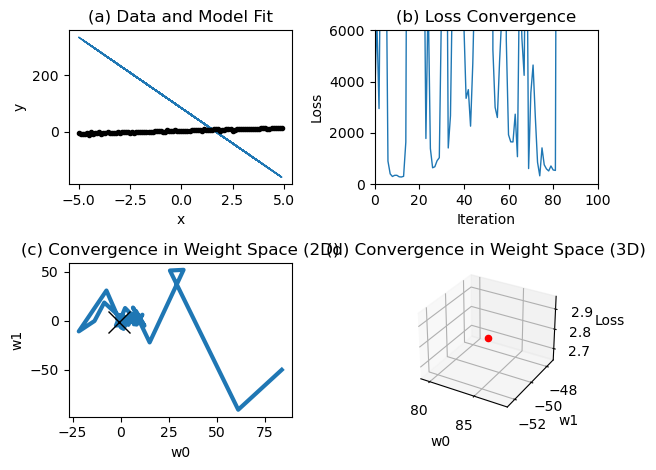

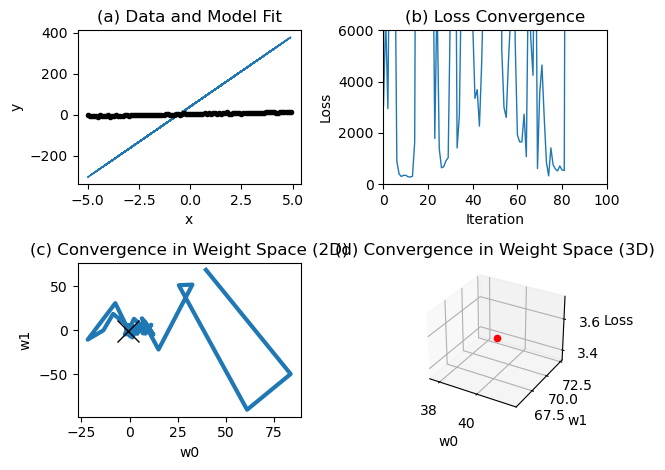

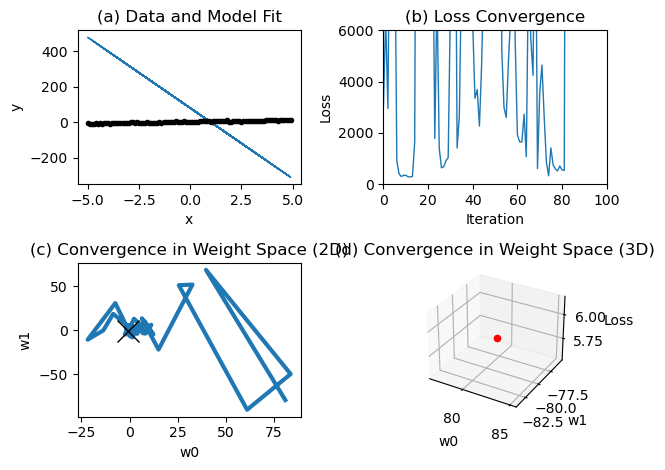

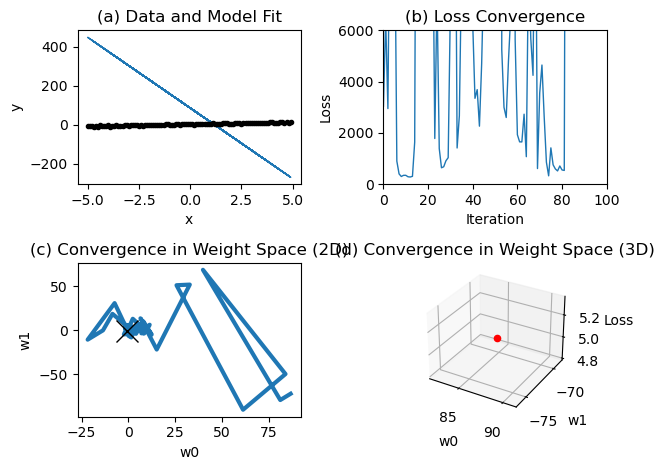

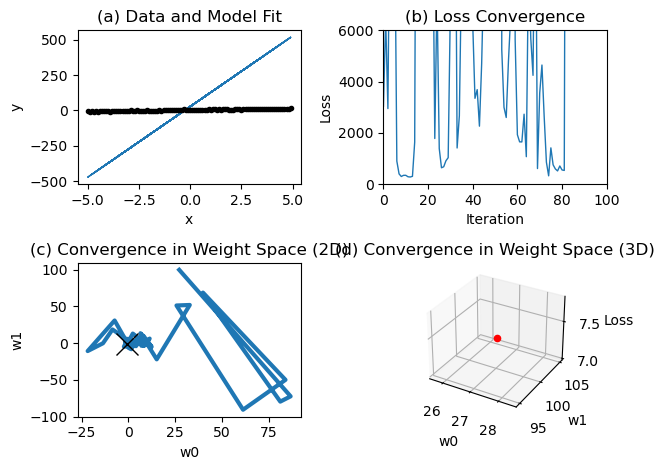

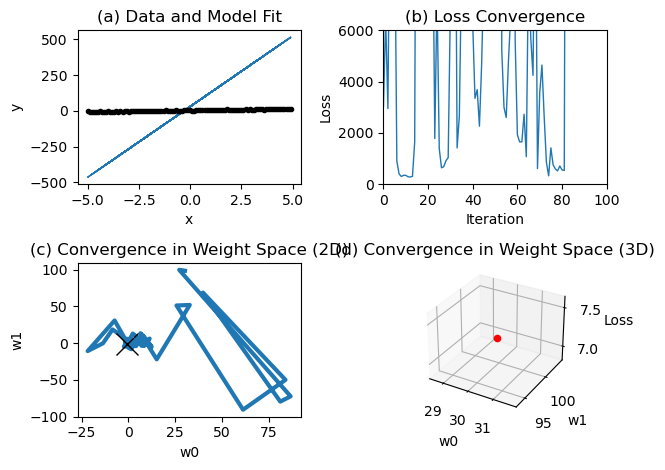

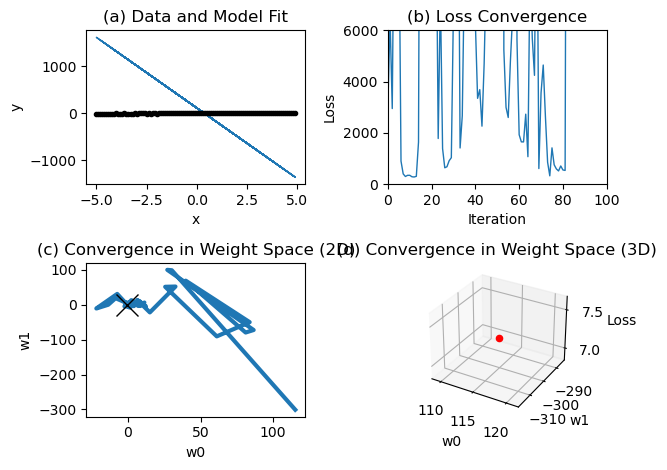

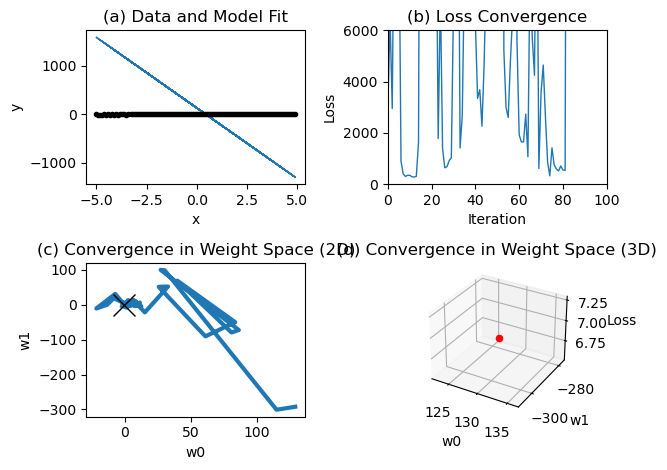

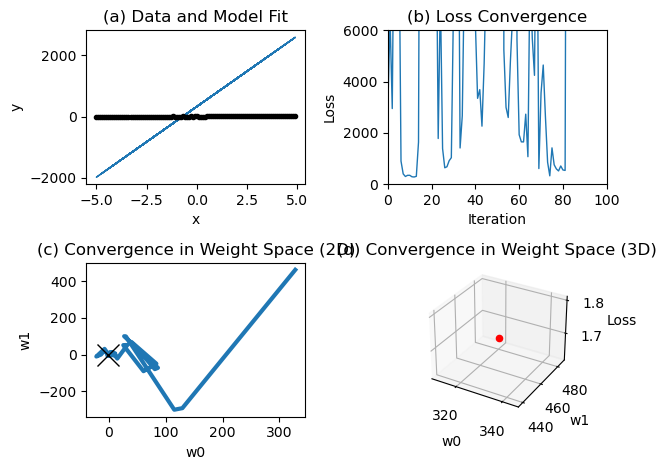

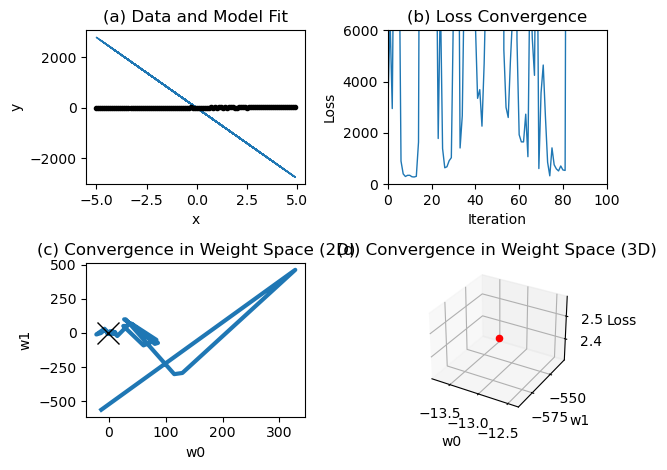

In [15]:
# Evaluate loss function over grid of parameter values w1 and w0
w1vec = np.linspace(-1, 5, 300)  # vector of w1 values
w0vec = np.linspace(-1, 5, 200)  # vector of w0 values
Z = np.empty((len(w1vec), len(w0vec)))  # initialise cost matrix

for ii in range(len(w1vec)):
    for jj in range(len(w0vec)):
        yhat = np.dot(np.array([w0vec[jj], w1vec[ii]]), X[idx].T)
        Z[ii, jj] = np.sum((yhat - y[idx])**2)

# Initialise figure
fig = plt.figure(figsize=(12, 8))

# Plot results: loop over all parameter updates
for j in range(maxIter):

    # Unpack parameter values
    theta = thetaStore[:, j]

    # Loss function evaluation on training data
    yhat = np.dot(theta, X[idx].T)  # model prediction
    lossTrain[j] = np.sum((yhat - y[idx])**2)  # loss

    # Plot results
    plt.clf()

    # Data and model fits
    plt.subplot(2, 2, 1)
    plt.plot(x[idx], yhat, linewidth=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, y, '.k')
    plt.title('(a) Data and Model Fit')

    # Convergence of the loss function over iterations
    plt.subplot(2, 2, 2)
    plt.plot(lossTrain[:j + 1], linewidth=1)
    plt.title('(b) Loss Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.xlim(0, maxIter)
    plt.ylim(0, 6000)

    # 2D view of the convergence of the weights
    plt.subplot(2, 2, 3)
    plt.contourf(w0vec, w1vec, Z)
    plt.plot(thetaStore[0, :j + 1], thetaStore[1, :j + 1], linewidth=3)
    plt.plot(w0, w1, 'kx', markersize=16)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('(c) Convergence in Weight Space (2D)')

    # 3D view of the convergence of the weights
    ax = plt.subplot(2, 2, 4, projection='3d')
    ax.scatter(theta[0], theta[1], lossTrain[j], c='r', marker='o')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_zlabel('Loss')
    ax.set_title('(d) Convergence in Weight Space (3D)')

    plt.tight_layout()
    plt.draw()
    plt.pause(0.1)

plt.show()
